In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from heisenberg_hqa import run_heisenberg_hqa_from_datafile, datafile_to_dataframe, test_hqa
import seaborn as sns

/home/maiyuren/anaconda3/envs/quantum_computing/lib/python3.7/site-packages/qiskit/validation/fields/custom.py:76: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpy.integer, numpy.float,


Taking 5 qubits
No such device.
Availability of gpu: False


### Load Data

In [7]:
# Loading data
data = datafile_to_dataframe("state_files/data_n_qubits-6.pkl")
data = data[data.depth==4]
distributions = np.array(data.statevector.to_list())
characteristics = np.array([[j]+ i for i, j in zip(data.Jlist.tolist(), data.depth.tolist())])

## Train model

In [12]:
model = run_heisenberg_hqa_from_datafile("data.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'data.pkl'

## Load model

In [29]:
filename = "pickled_models/hqa_model_ver_6.pickle"   # For 6 qubits
# filename = "pickled_models/hqa_model_ver_4.pickle" # For 8 qubits
with open(filename, "rb") as f:
    model = pickle.load(f)
model.reset_q_circs()

# Analysis

In [30]:
# Testing the HQA
test_results = test_hqa(model, 50, distributions)

100%|██████████| 50/50 [00:03<00:00, 14.87it/s]

Average Loss: 0.05261015418878671


In [76]:
# Creating the vectors
model.create_latent_vectors(distributions, characteristics)
# model.pca_transform_latent_vectors(3, True)
model.dataframe_latent_points('heisenberg')
model.latent_landscape(0,1,2)

100it [00:02, 45.42it/s]


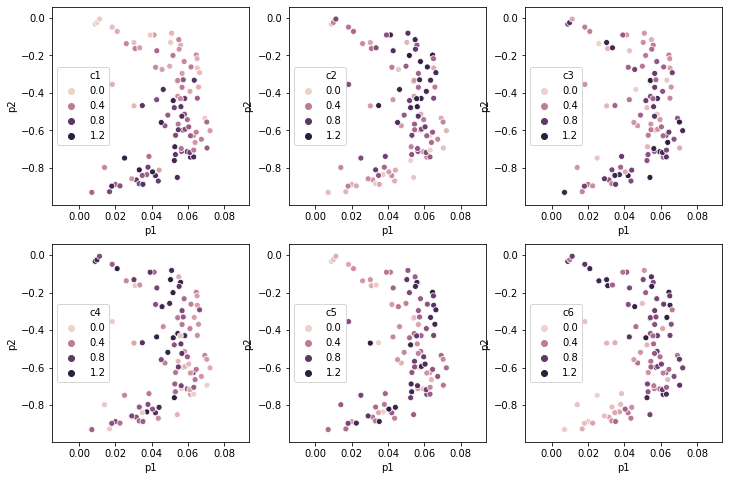

In [93]:
fig, axs = plt.subplots(2,3, figsize=(12,8))
sns.scatterplot(x="p1", y="p2", hue='c1', data=model.df_latent_vectors, ax=axs[0][0])
sns.scatterplot(x="p1", y="p2", hue='c2', data=model.df_latent_vectors, ax=axs[0][1])
sns.scatterplot(x="p1", y="p2", hue='c3', data=model.df_latent_vectors, ax=axs[0][2])
sns.scatterplot(x="p1", y="p2", hue='c4', data=model.df_latent_vectors, ax=axs[1][0])
sns.scatterplot(x="p1", y="p2", hue='c5', data=model.df_latent_vectors, ax=axs[1][1])
sns.scatterplot(x="p1", y="p2", hue='c6', data=model.df_latent_vectors, ax=axs[1][2])

In [72]:
model.df_latent_vectors

,c1,c2,c3,c4,c5,c6,depth,latent_vector,p1,p2,p3
0,0.430462,0.487339,0.142716,0.143044,0.865578,0.389400,4.0,"[-0.008811078, 0.0021356617, 0.00010046874]",-0.008811,0.002136,0.000100
1,0.455893,0.488670,0.173343,0.174870,0.783936,0.410300,4.0,"[-0.011759897, 0.0011050362, -2.786217e-05]",-0.011760,0.001105,-0.000028
2,0.481323,0.490001,0.203970,0.206695,0.702295,0.431200,4.0,"[-0.012525124, 0.00019250465, -7.2958224e-05]",-0.012525,0.000193,-0.000073
3,0.506753,0.491332,0.234596,0.238520,0.620653,0.452100,4.0,"[-0.011196736, -0.0005459066, -5.9478705e-05]",-0.011197,-0.000546,-0.000059
4,0.532183,0.492662,0.265223,0.270345,0.539012,0.472999,4.0,"[-0.00791558, -0.0010430168, -1.4611215e-05]",-0.007916,-0.001043,-0.000015
5,0.557613,0.493993,0.295850,0.302171,0.457371,0.493899,4.0,"[-0.002941486, -0.0012375691, 3.3885844e-05]",-0.002941,-0.001238,0.000034
6,0.583043,0.495324,0.326477,0.333996,0.375729,0.514799,4.0,"[0.0033014514, -0.0010946698, 6.08347e-05]",0.003301,-0.001095,0.000061
7,0.608473,0.496654,0.357104,0.365821,0.294088,0.535699,4.0,"[0.010271849, -0.0006270302, 5.1878887e-05]",0.010272,-0.000627,0.000052
8,0.633903,0.497985,0.387731,0.397646,0.212446,0.556599,4.0,"[0.017390383, 0.00010458683, 3.7300865e-06]",0.017390,0.000105,0.000004
9,0.659334,0.499316,0.418358,0.429472,0.130805,0.577499,4.0,"[0.024186334, 0.0010109405, -7.594293e-05]",0.024186,0.001011,-0.000076


# Regression Analysis

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [98]:
X = model.latent_vectors
y = characteristics[:, 1]
X, X_test, y, y_test = train_test_split(X, y, test_size=0.5)

# Models
reg_lin = LinearRegression().fit(X, y)
reg_svm = svm.SVR().fit(X, y)
reg_ridge = Ridge(alpha=0.1).fit(X, y)

In [99]:
print("Linear reg score =", reg_lin.score(X_test, y_test))
print("SVM reg score    =", reg_svm.score(X_test, y_test))
print("Ridge reg score  =", reg_ridge.score(X_test, y_test))

Linear reg score = 0.4659206241406698
SVM reg score    = 0.4774260550508428
Ridge reg score  = 0.5152889782432366


In [100]:
print("actual, predictied")
yy = reg_lin.predict(X)
list(zip(y, yy))

actual, predictied


[(0.7358188597907683, 0.7208355072097752),
 (0.9372647939470479, 0.6528682656254126),
 (0.39585895712472485, 0.613056723517099),
 (0.35352333102038114, 0.255322337514043),
 (0.8990648874681509, 0.6157250712538089),
 (0.19446018303289425, 0.2388323454321184),
 (0.5849456602632519, 0.8552101771422804),
 (0.15428517042427659, 0.05121332992303573),
 (0.07216614826370105, 0.19880602933989033),
 (0.32062614689725544, 0.5712512121967293),
 (0.25466053043094183, 0.14697811429591323),
 (0.6883479965056358, 0.45837774495942707),
 (0.5798621836450628, 0.8047859571110481),
 (0.336658365320761, 0.5599697494195786),
 (0.48478503218221625, 0.5609547960237486),
 (0.8338307680574283, 0.6314229462290153),
 (0.1781804696464354, 0.4232941043063396),
 (0.7289491567192258, 0.5784571981996298),
 (0.929904474149097, 0.9087371607672221),
 (0.48268835752022854, 0.44190306466575313),
 (0.25027538382481285, 0.4273831670455255),
 (0.5296100742654171, 0.7701478257401604),
 (0.25994366651980416, 0.6333079190315547),

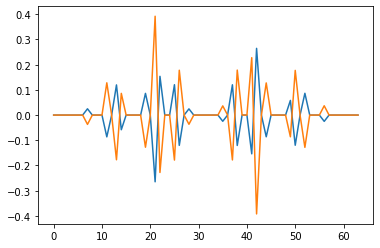

In [10]:
plt.plot(distributions[3].imag)
plt.plot(distributions[3].real)